# Overview and background
## Background
My name is Brad Messer and I'm a machine learning and big data aficionado whose been following the field since my junior year of college when I first heard about it. At that point, I'd been bouncing around between a few different paths and once I heard about data science (and **particularly how it could help people**) I was hooked. Upon hearing about it, I got heavily involved in the applied mathematics side of my major via mathematical modeling (think more traditional statistical analysis with a research heavy focus) and undergraduate research in dynamical systems and complexity theory. 

Have you ever thought about the [mathematics that describes how birds move in a flock?](https://www.youtube.com/watch?app=desktop&v=0dskCpuxqtI&ab_channel=CGTN) An advanced application of differential equations is something I had the pleasure of spending 1.5 years working on during my time in college.

Senior year, I received an offer from IBM Z and I've been working as a software tester since, shipping Real-Time SMF and the IzODA product in my time there. It has been an incredible pleasure working on this platform and would strongly recommend it. You learn so much in just a short amount of time and the people are absolutely amazing.

With data science here to stay, I'm intrigued at getting back into the mathematical side of things. Hopefully that shows throughout the notebook here.

## Overview
Why did I go through all of that above? In my time working on various notebooks, you will likely see me relying on my previous training for decisions I make. In particular, I've already gone through the data for the [titanic dataset present here](https://www.kaggle.com/c/titanic/data?select=gender_submission.csv) and identified different variables I would like to use inside of a logistic regression classifier. At this time, I'm trying to keep things simple as I'm just getting through a "Machine Learning Scientist with python" track on datacamp and am looking to stretch my legs before jumping into the deep end. I look forward to working on this problem with you though and hope you enjoy following along :)

# Exploratory data analysis
This problem might not be completely representative of my ability since I've got prior experience with it from a data science seminar hosted by a friend at work. I'd still like to work through it though and show my thoughts as this will give me a chance to work with the material I just learned in the "Machine learning scientist with python" track.

Moving along, based on the previous knowledge of this problem and training, I'm really interested in using the following fields in my analysis:
1. Survival - this is our binary categorical predictor variable for the problem. Either the people survived or they didn't and an analysis of this problem should reveal the underlying patterns about which people survived and which people didn't.
2. Pclass - This is where prior knowledge regarding this problem comes into play. Rooms on the titanic were distributed into 3 different classes. Those in first class were closer to the dock of the ship meanwhile 2nd and 3rd class rooms were distributed appropriately into lower floors on the ship, thus making it harder to reach the dock when the ship hit the iceberg.
3. Sex - Based on prior experience from the data science seminar hosted by my friend, women had more of a chance to survive than men did. Reviewing this variable in detail allows us to quantify and understand these relationships and attempt an explanation about what was happening when the titanic hit the iceberg based on gender.
4. Age - Again, my experience from the data science seminar kicks in and reminds me that different age ranges had a different chance of surviving. This model would help me quantify those relationships based on age range and provide some sort of explanation for what happened that night on the titanic.


## Considered, but left out variables
Just as important as what we use within our analysis is what we choose to leave out of our analysis. I chose to leave out these variables for the following reasons:

1. sibsp - With the aforementioned variables selected above, this would do nothing but complicate our model unnecessarily and make it even harder to understand the current relationships inside the model by adding an extra dimension and drawing away predictive power from the existing variables. This variable does offer an interesting chance to investigate the problem from another angle though and may be considered for later iterations.

2. parch - Same reason as sibsp. The investigation could utilize this variable though if we would like to put a different spin on the analysis.

3. ticket - Ticket number. This seems to play a similar role as passenger id and thus seems redundant inside the analysis.

4. fare - Passenger fare. Pclass, a proxy for socio-economic status inside of the dataset plays a similar role and thus makes this field redundant inside of the data.

5. cabin - Cabin number. Again, this feels outmoded by the use of pclass, the ticket class inside of the model.

6. embarked - Port of embarkation or where the passengers boarded the ship. Based on prior knowledge of the problem from the data science seminar I was in, each value again roughly approximates a person's socio-economic status covered by pclass and thus we can eliminate this from consideration in our model.

## Reading in the data and performing the analysis
With all that out of the way, we can finally read in the csv file and begin doing exploratory data analysis on the considered variables.

In [111]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
base_train = train.drop(['SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name'], axis=1)

In [11]:
base_train.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


## Trimming down the data
With the data trimmed down precisely to where I need it, I can take a look inside the categorical variables and get an idea if any class imbalances exist inside my data. If so, it could be helpful to account for this in my analysis.

In [12]:
base_train[['Survived', 'Pclass', 'Sex']].value_counts()

Survived  Pclass  Sex   
0         3       male      300
1         1       female     91
0         2       male       91
          1       male       77
1         3       female     72
0         3       female     72
1         2       female     70
          3       male       47
          1       male       45
          2       male       17
0         2       female      6
          1       female      3
dtype: int64

I must admit I was not expecting a multi-index to be returned like the one above but this makes it all the easier to understand the breakdown of different classes inside of the analysis. Now, let me look at the value counts on these same columns independently to understand total proportions where our proportions reside and what needs done in order to move this forward.

In [13]:
base_train[['Survived']].value_counts()

Survived
0           549
1           342
dtype: int64

In [14]:
base_train[['Pclass']].value_counts()

Pclass
3         491
1         216
2         184
dtype: int64

In [15]:
base_train[['Sex']].value_counts()

Sex   
male      577
female    314
dtype: int64

## Analysis so far
Even digging in so far, the number of dead people are overwhelmingly represented by males from the third ticket class (i.e. 300 in the full complex chart). Looking into females from the same ticket class, it looks like that number drops down to 72, which is quite a stark difference.

Since this is becoming a trend, let's break down the interpretation here for easier interpretation by myself and the reader.

Statistics of those who died on the titanic:
- 300 3rd class males
- 72 3rd class females
- 91 2nd class males
- 6 2nd class females
- 77 first class males
- 3 first class females

Statistics of those who survived the titanic:
- 47 3rd class males
- 72 3rd class females
- 17 2nd class males
- 70 2nd class females
- 45 1st class males
- 91 1st class females

To help break this down even further, it would be great to have charts of those who did not survive and those who did survive and understand how different factors played into this role. I'll start by generating a seaborn pairplot and see if that accurately explains what I'm seeing.

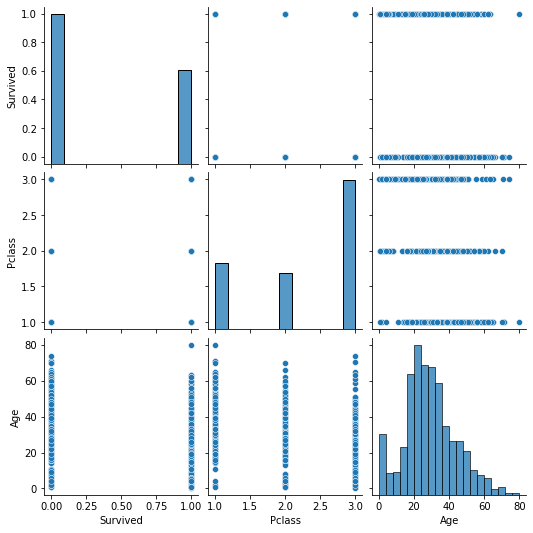

In [26]:
sns.pairplot(base_train.drop('PassengerId', axis=1))

In this pair plot, age is very well normally distributed with a slight right skew, so I won't worry about it much. Thinking through my problem more, I'd like to generate a histogram stratifying by both gender and ticket class to give the best idea of how the gender and ticket class effects contributed to survival rates of the crew.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

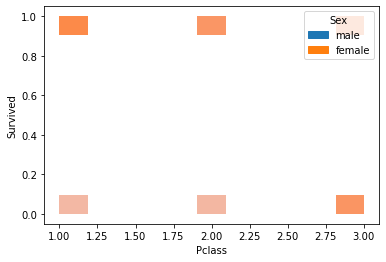

In [27]:
sns.histplot(x='Pclass', y='Survived', hue='Sex', data=base_train)

Unfortunately based on [Michigan University's "Understanding and Visualizing Data with Python week 3 lab"](https://www.coursera.org/learn/understanding-visualization-data/ungradedLab/FIesi/lab) on coursera, I don't have a better way to visualize categorical bivariate data and really display what I'm trying to show. In the interest of time, I'll stick with the psuedo contingency table shown above and move along in my analysis.

## Cleaning the data
Before going further, let's get an idea of what the missing values look like in the variables of interest and how we can address these in during Feature Engineering.

In [33]:
base_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
dtype: int64

Based on this above output, it looks like we have no missing values in any of the predictor variables except age, which corresponds to a total of 177 missing values. Let's get a total count of the number of rows and then we can decide how we want to handle filling in this data.

In [34]:
len(base_train['PassengerId'])

891

177 missing observations across a total of 891 total entries is a lot of potential information that we'd be missing out on. Let's use an imputation strategy to fill this in during our Feature Engineering section of the analysis.

In [37]:
base_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Based on these statistics, it seems like the mean is overall more representative of the data and would help better fill in these missing values than the median. The mode also doesn't capture the higher level values as I'd like, so I'm not going to consdier that in this analysis.

## Feature Engineering
Now that we're a good chunk into our analysis and have found some interesting patterns, we can begin to clean up the data into something more useful for a machine learning algorithm. More details on the [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), but I'm checking the fit, predict methods to understand what format this model takes. Since it's an array-like or sparse matrix of shape (n samples, n features) for the X parameter and an array like of (nsamples,) for the y variable, I'll use OneHotEncoder to clean up the categorical predictor variables and LabelBinarizer to clean up my categorical response variable.

In [57]:
imputer = SimpleImputer()
ohe_estimator = OneHotEncoder(categories=['Pclass', 'Sex'], drop='first')
label_bin = LabelBinarizer()

In [58]:
base_train['Age'] = imputer.fit_transform(base_train['Age'].values.reshape(-1, 1))
base_train.isnull().sum()
#base_train = ohe_estimator.fit_transform(base_train)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
dtype: int64

In [59]:
encoded_cols = ohe_estimator.fit_transform(base_train['Pclass', 'Sex'])
encoded_cols_df = pd.DataFrame(encoded_cols, index=base_train.index)
enocded_cols_df.head()

KeyError: ('Pclass', 'Sex')

In [48]:
base_train.shape

(891, 5)

In [ ]:
base_train.drop('PassengerId', axis=1, inplace=True)
base_train = pd.get_dummies(base_train, columns=['Pclass', 'Sex'], drop_first=True)

From the above output, I truly did want to use onehot encoding for its ability to be stuck inside of a sklearn pipeline, but I'm finding my skill level is not quite at that level yet. Working through more of these problems on my own as well as working with people more familiar with this technology than myself would be incredibly useful in my growth as a data scientist.

[Referencing this notebook](https://www.kaggle.com/theblackmamba31/voting-classifier-on-titanic), it seems like I can drop the passenger id on the training data and keep the passenger id ok in the test data to pass it through a logistic regression function. Let's see what we can do here.

In [74]:
# base_train.drop('PassengerId', axis=1, inplace=True)
base_train.head()

,Survived,Age,Pclass_2,Pclass_3,Sex_male
0,0,22.0,0,1,1
1,1,38.0,0,0,0
2,1,26.0,0,1,0
3,1,35.0,0,0,0
4,0,35.0,0,1,1


## Cleaning up our test data
These steps that we've put into cleaning up the training data will also need to be put into cleaning up the test data as well. Usually a pipeline would make this much easier on us, but unfortunately my skill level isn't at that level yet.

In [76]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [68]:
base_test = test.drop(['SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name'], axis=1)

In [69]:
base_test['Age'] = imputer.fit_transform(base_test['Age'].values.reshape(-1, 1))

In [71]:
base_test = pd.get_dummies(base_test, columns=['Pclass', 'Sex'], drop_first=True)

In [75]:
base_test.head()

,PassengerId,Age,Pclass_2,Pclass_3,Sex_male
0,892,34.5,0,1,1
1,893,47.0,0,1,0
2,894,62.0,1,0,1
3,895,27.0,0,1,1
4,896,22.0,0,1,0


In [73]:
base_test.columns

Index(['PassengerId', 'Age', 'Pclass_2', 'Pclass_3', 'Sex_male'], dtype='object')

## Fitting the logistic regression classifier
With the data cleaned as desired (in particular keeping the cleaning methodology consistent in case errors arise so we can easily backtrack and correct), we're ready to fit the model and submit our results to kaggle.

In [98]:
lr = LogisticRegression()
lr.fit(base_train[['Age', 'Pclass_2', 'Pclass_3', 'Sex_male']].values, base_train[['Survived']].values.ravel())
predictions = lr.predict(base_train[['Age', 'Pclass_2', 'Pclass_3', 'Sex_male']].values)

In [99]:
predictions

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [95]:
base_test.head()

,PassengerId,Age,Pclass_2,Pclass_3,Sex_male
0,892,34.5,0,1,1
1,893,47.0,0,1,0
2,894,62.0,1,0,1
3,895,27.0,0,1,1
4,896,22.0,0,1,0


In [100]:
accuracy_score(base_train['Survived'].values, predictions)

0.797979797979798

In [101]:
predictions1 = lr.predict(base_test[['Age', 'Pclass_2', 'Pclass_3', 'Sex_male']].values)

In [102]:
predictions1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [106]:
sub_csv_df = pd.DataFrame({'PassengerId': base_test.PassengerId, 'Survived': predictions1})

In [110]:
sub_csv_df.to_csv('submission.csv', index=False)

## Re-engineering this model
With a basic model, I've gotten about 141st place tied with numerous others on this same problem and I'm hoping to continue developing these skills. Based on this problem as well as my goals, I should be able to squeeze out more accuracy by using cross-validation and hyper parameter tuning. Based on business requirements as stated by kaggle though, I would not attempt to try any other models. This problem based on the definition truly says logistic regression to me and trying any other models might things overly complex for the business use case. Let's see what we can get and I'll look into other competitions to sharpen my skills.

For tuning this model, I've got a few options on how best to proceed:
1. GridSearchCV
2. RandomSearchCV
3. Hyperopt - Bayesian Hyper Parameter tuning

Based on my current skillset, picking something like GridSearchCV or RandomSearchCV would give me a chance to start building my intuition for good hyper-parameter choices for different models. Once I move past these initial stages, I can start moving into more advanced options.

I'll also mention that TPOT could be a choice for varying up my choice of model too, but that's wouldn't necessarily fit within the confines of the business use case depending. Let's build towards Hyperopt for iterative hyperparameter search and I can continue moving forward from here.

## Hyperparameters and Cross validation
Starting out, I'm going to use GridSearchCV to see if I can squeeze any more performance out of my logistic regression model before moving on to another competition.

In [112]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [113]:
!conda list

# packages in environment at /home/messerb/anaconda3/envs/kaggle-env:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       1_gnu    conda-forge
_py-xgboost-mutex         2.0                       cpu_0    conda-forge
_tflow_select             2.3.0                       mkl    anaconda
absl-py                   0.10.0                   py38_0    anaconda
aiohttp                   3.6.3            py38h7b6447c_0    anaconda
argon2-cffi               20.1.0           py38h25fe258_2    conda-forge
astunparse                1.6.3                      py_0    anaconda
async-timeout             3.0.1                    py38_0    anaconda
async_generator           1.10                       py_0    conda-forge
attrs                     20.2.0                     py_0    anaconda
backcall                  0.2.0              pyh9f0ad1d_0    conda-forge
bac

tornado                   6.0.4            py38h7b6447c_1    anaconda
tqdm                      4.54.1                   pypi_0    pypi
traitlets                 5.0.5                      py_0    anaconda
typing_extensions         3.7.4.3                    py_0  
urllib3                   1.25.11                    py_0    anaconda
wcwidth                   0.2.5              pyh9f0ad1d_2    conda-forge
webencodings              0.5.1                      py_1    conda-forge
werkzeug                  1.0.1                      py_0    anaconda
wheel                     0.35.1                     py_0    anaconda
wrapt                     1.12.1           py38h7b6447c_1    anaconda
xgboost                   1.3.0            py38h709712a_1    conda-forge
xz                        5.2.5                h7b6447c_0    anaconda
yaml                      0.2.5                h7b6447c_0    anaconda
yarl                      1.6.2            py38h7b6447c_0    anaconda
zeromq                   

Based on my scikit-learn version of 0.23.2 and this [documentation](https://scikit-learn.org/0.23//_downloads/scikit-learn-docs.pdf) outlining the different hyperparameters present on the LogisticRegression estimator, I'm going to scale the age data with StandardScaler to be on a similar scale as other categorical, one-hot encoded features. I'm on the fence if encoding the target value is needed since the "Survived" column is already in a binary state. Let's experiment with StandardScaler on age and using a GridSearchCV object nets us a better model in the long run first before considering that.

## Model take 2

In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
stand_scaler = StandardScaler()

In [116]:
age_train = base_train.copy()
age_test = base_test.copy()

<AxesSubplot:xlabel='Age', ylabel='Count'>

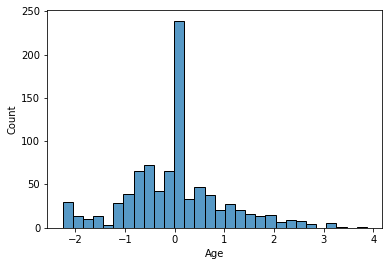

In [117]:
age_train['Age'] = stand_scaler.fit_transform(age_train['Age'].values.reshape(-1, 1))
sns.histplot(x='Age', data=age_train)

In the name of transparency, I was fully expecting StandardScaler to trim this down between values 0 and 1 instead of just doing everything between -2 and 4. This seems like one of those things I can improve on over time though so I'll focus on improving in the long term instead of getting everything perfect now.

<AxesSubplot:xlabel='Age', ylabel='Count'>

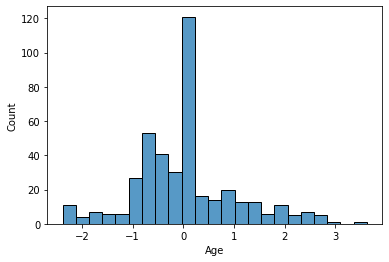

In [120]:
age_test['Age'] = stand_scaler.fit_transform(age_test['Age'].values.reshape(-1, 1))
sns.histplot(x='Age', data=age_test)

In [118]:
lr1 = LogisticRegression()
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'fit_intercept': [True, False]}
grid_search = GridSearchCV(lr1, param_grid, scoring='accuracy', cv=6, refit=True)

Based on the above options, I should get a best 1 out of 60 models based on 5 solvers, 2 fit_intercept parameters, and 6 folds used in cross-validation.

In [130]:
grid_search.fit(age_train[['Age', 'Pclass_2', 'Pclass_3', 'Sex_male']].values, age_train[['Survived']].values.ravel())

GridSearchCV(cv=6, estimator=LogisticRegression(),
             param_grid={'fit_intercept': [True, False],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [131]:
grid_search

GridSearchCV(cv=6, estimator=LogisticRegression(),
             param_grid={'fit_intercept': [True, False],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [132]:
grid_search.best_params_

{'fit_intercept': True, 'solver': 'newton-cg'}

In [133]:
grid_search.best_score_

0.7934427716306911

At this point, without moving into model stacking, ensembling, or any else that would jeopardize explainaiblity of our model, I think we've squeezed out as much performance as we can here. Comparing accuracy scores, using cross validation and grid searching across the parameters actually made the model model slightly worse. Given my background on this problem, it would be best to move onto other problems so I can start building a better intuition for different kinds of problems.

In [134]:
predictions1 = grid_search.predict(age_test[['Age', 'Pclass_2', 'Pclass_3', 'Sex_male']].values)

In [135]:
sub_csv_df2 = pd.DataFrame({'PassengerId': age_test.PassengerId.values, 'Survived': predictions1})

In [136]:
sub_csv_df2.to_csv('submission2.csv', index=False)

## Reflection
Overall, I came into this problem having a good amount of background and was able to stretch my legs. I did scan over other competitors notebooks slightly, but moreso used it as a reference when I needed help rather than relying on their thoughts to get me through the process. Depending on a production use-case, this might be the best we can do. To better inform those results later on though, I'm planning to follow up with the IBM AI workflow certificate on coursera and really earn my right to work as a data scientist.